Loading required package: ggplot2



,pain_score,group
,<int>,<fct>
1,3,group_1
2,1,group_1
3,1,group_1
4,4,group_1
5,4,group_1
6,5,group_1
7,1,group_1
8,3,group_1
9,3,group_1



	Kruskal-Wallis rank sum test

data:  pain_score by group
Kruskal-Wallis chi-squared = 10.731, df = 2, p-value = 0.004675

[1] "There is a significant difference in the mean ranks of the treatment groups."

	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  df$pain_score and df$group 

        group_1 group_2
group_2 0.0280  -      
group_3 0.0072  0.6204 

P value adjustment method: BH 
[1] "There was a significant difference between the mean ranks of the pain scores of of group 1 & group 2"
[1] "There was a significant difference between the mean ranks of the pain scores of of group 1 & group 3"


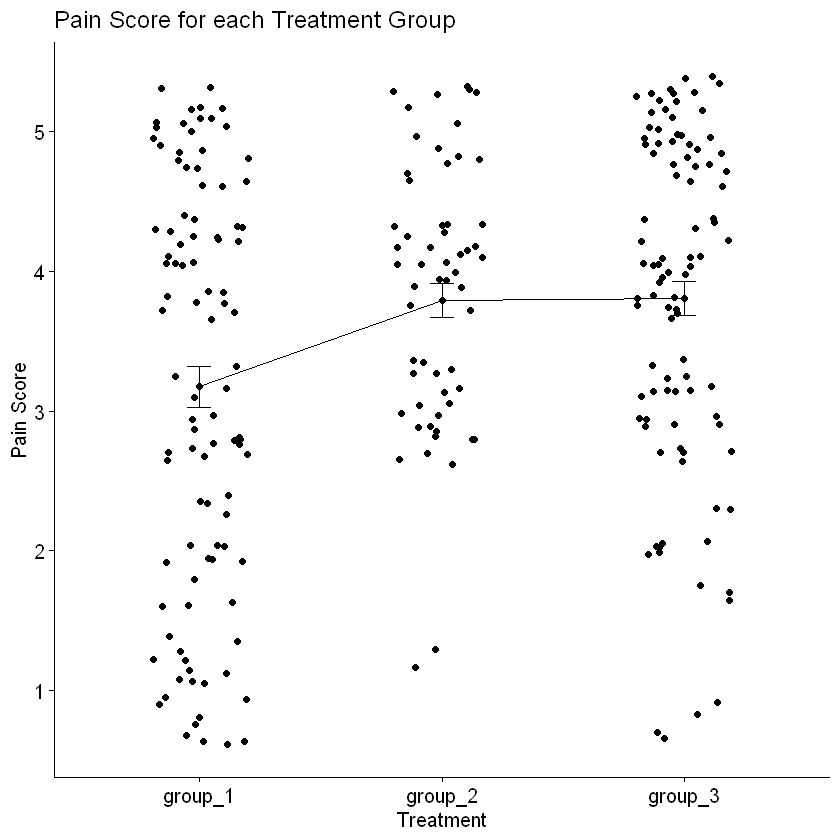

In [1]:
library("ggpubr")

# probabilistically deciding if there will be a significant difference between the pain severity outcome scores
# for three treatment groups (independent samples)

coinflip = sample(c(0,1), 1)

sample_sizes = seq(20, 100)

if(coinflip == 1){
    sample_1 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample(sample_sizes,1))
    sample_2 = sample(seq(5), prob = c(0.5/5, 0.5/5, 1.5/5, 1.5/5, 1/5), replace= TRUE, size = sample(sample_sizes,1))
    sample_3 = sample(seq(5), prob = c(0.1/5, 0.4/5, 1/5, 1.75/5, 1.75/5), replace= TRUE, size = sample(sample_sizes,1))
    }else{
    sample_1 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample(sample_sizes,1))
    sample_2 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample(sample_sizes,1))
    sample_3 = sample(seq(5), prob = c(1/5, 1/5, 1/5, 1/5, 1/5), replace= TRUE, size = sample(sample_sizes,1))
}

# generating labels for each score in each group
group_1_labels = rep('group_1', length(sample_1))
group_2_labels = rep('group_2', length(sample_2))
group_3_labels = rep('group_3', length(sample_3))

# creating a dataframe for the simulated data
df = data.frame(pain_score = c(sample_1, sample_2, sample_3),
                group = c(group_1_labels, group_2_labels, group_3_labels))

df$group = as.factor(df$group)
head(df, 10)

# generating a line plot showing the pain scores for the three treatment groups
ggline(df, x = "group", y = "pain_score", 
       add = c("mean_se", "jitter"), 
       ylab = "Pain Score", xlab = "Treatment",
      main = 'Pain Score for each Treatment Group')

# performing a kruskal-wallis h test

krusk_res = kruskal.test(pain_score ~ group, data = df)
print(krusk_res)

# performing pairwise comparisons, corrected for multiple testing, if the kruskal-wallis test is significant
if(krusk_res$p.value <= 0.05){print('There is a significant difference in the mean ranks of the treatment groups.')
                             pairwise_res = pairwise.wilcox.test(df$pain_score, df$group,
                             p.adjust.method = "BH", exact = FALSE)
                                print(pairwise_res)
                              if(pairwise_res$p.value[1] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of group 1 & group 2')}
                              if(pairwise_res$p.value[2] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of group 1 & group 3')}
                              if(pairwise_res$p.value[4] <= 0.05) 
                              {print('There was a significant difference between the mean ranks of the pain scores of of group 2 & group 3')}
                             }else{print('There is NOT a significant difference in the mean ranks of the treatment groups.')}